# Biosignal processing

Cleaning : preparing signals for processing.

#### Dependencies

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%pylab inline
sns.set_style('darkgrid')
pylab.rcParams['figure.figsize'] = (12.0, 6.0)  
plt.rcParams.update({'font.size': 14})

Populating the interactive namespace from numpy and matplotlib


In [94]:
%run ~/cneuromod/ds_prep/physio/preproc/neuromod_process.py

In [6]:
json=pd.read_json("/scratch/flesp/physio_data/friends/sub-01/ses-001/neuromod_video52020-01-14T10_44_20_04.json")

In [7]:
fs = json['SamplingFrequency'][0]

In [8]:
bio_df = pd.read_csv("/scratch/flesp/physio_data/friends/sub-01/ses-001/neuromod_video52020-01-14T10_44_20_04.tsv.gz",
                     sep='\t',
                     compression='gzip',
                     header=None,
                     names=json.Columns)

In [60]:
signals, info_corrected= neuromod_ppg_process(bio_df['PPG'], fs)

/home/francois.lespinasse/anaconda3/envs/biosigEnv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/francois.lespinasse/anaconda3/envs/biosigEnv/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


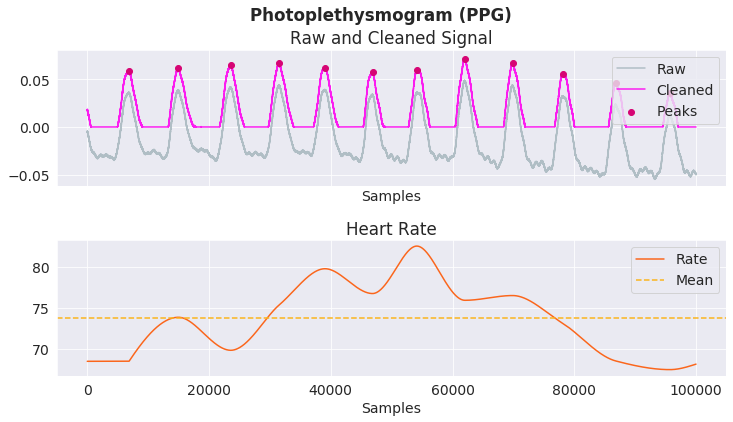

In [105]:
fig = nk.ppg_plot(signals[:100000])

In [62]:
rate = nk.signal_detrend(signals['PPG_Rate'], order=1)

In [72]:
len(info_corrected['PPG_Peaks'])

840

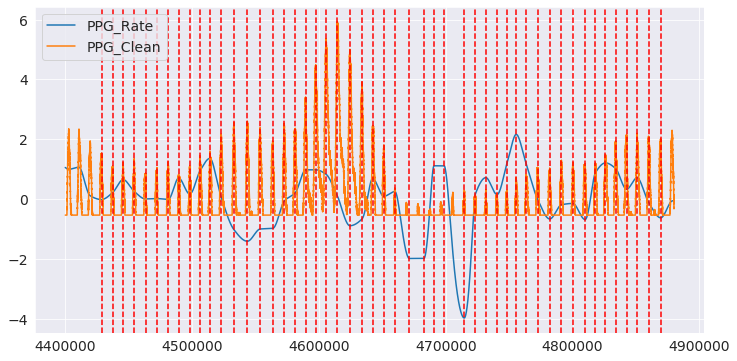

In [88]:
fig = nk.events_plot(info_corrected['PPG_Peaks'][500:550],nk.standardize(signals[['PPG_Rate','PPG_Clean']][4400000:4880000]))

In [95]:
bio_df, bio_info = neuromod_bio_process(df=bio_df, sampling_rate=fs)

In [106]:
bio_df.keys()

Index(['PPG_Raw', 'PPG_Clean', 'PPG_Rate', 'PPG_Peaks', 'ECG', 'RSP_Raw',
       'RSP_Clean', 'RSP_Amplitude', 'RSP_Rate', 'RSP_Phase',
       'RSP_Phase_Completion', 'RSP_Peaks', 'RSP_Troughs', 'EDA_Raw',
       'EDA_Clean', 'EDA_Tonic', 'EDA_Phasic', 'SCR_Onsets', 'SCR_Peaks',
       'SCR_Height', 'SCR_Amplitude', 'SCR_RiseTime', 'SCR_Recovery',
       'SCR_RecoveryTime', 'TTL'],
      dtype='object')

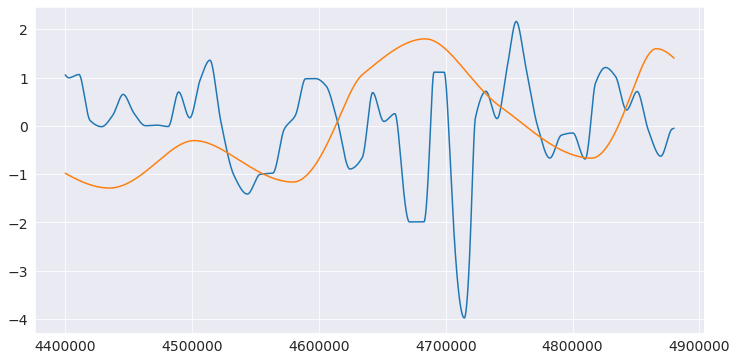

In [102]:
plt.plot(nk.standardize(bio_df[['PPG_Rate','RSP_Rate']][4400000:4880000]))